# Quantum Teleportation Protocol

Suppose we have two parties, famously called Alice and Bob. 

Alice wants to send Bob some information about a qubit she has, specifically the probability amplitudes of her state. 

$$ |\psi_{Alice}\rangle = \alpha|0\rangle + \beta|1\rangle $$

Because of the no-cloning theroem, Alice can not simply copy and paste the state onto Bob's qubit. 

Alice needs to employ an entangled qubit to "teleport" the information about her qubit to Bob. 

It is called teleportation because Alice gives up her info to send it to Bob. In the end only Bob has it, so we are not copying the information only teleporting it over. 

Let's try this out in Qiskit. 

### Imports 
Dont forget your imports! 

In [1]:

from qiskit import *

S_simulator=Aer.backends(name='statevector_simulator')[0] # allows you to simulate statevectors
M_simulator=Aer.backends(name='qasm_simulator')[0] # allows you to simulate measurements

In [2]:
# For teleportation to work we need a qubit
# for ALice, a qubit for Bob, an entangled
# qubit for them to share and their own


alice_qubit = QuantumRegister(1, name='a_q')
bob_qubit = QuantumRegister(1, name='b_q')
entangled_qubit = QuantumRegister(1, name='e_q')

#we need classical bits to hold results and 
# tell us what we need to do to bob's qubit
# to match ALice

z_clbit=ClassicalRegister(1,name='z')
x_clbit=ClassicalRegister(1,name='x')


teleportation_circuit = QuantumCircuit(alice_qubit,
                                      entangled_qubit,
                                       bob_qubit,
                                      z_clbit,
                                      x_clbit)

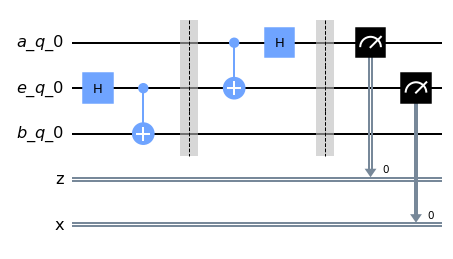

In [3]:
# now we make a bell pair 
# we need any of the maximally entangled bell states with the eentangled 
# qubit and bob's qubit
# H gate plus CX does the trick

teleportation_circuit.h(1)
teleportation_circuit.cx(1,2)

teleportation_circuit.barrier()

# now bring Alice and entangled's qubits together

teleportation_circuit.cx(0,1)
teleportation_circuit.h(0)

teleportation_circuit.barrier()
# now measure Alice and the qubit that is 
# entangled with Bob's 

teleportation_circuit.measure(0,0)
teleportation_circuit.measure(1,1)

teleportation_circuit.draw(output='mpl')



 Now all that is left to see these results and use them to do something based on what we get, 
 
 In this case we get j,k we will tell Bob to use $Z^j X^k$ on his qubit depending on the result. 

We can implement conditional gates based on measurements using c_if gates, or conditional if gates. They do something based on a condition set by a measurement of a qubit. 


In [4]:
teleportation_circuit.barrier()


# do x gate if x classical register is 1 
teleportation_circuit.x(2).c_if(x_clbit,1)
# do z gate if z classical regsiter is 1 
teleportation_circuit.z(2).c_if(z_clbit,1)

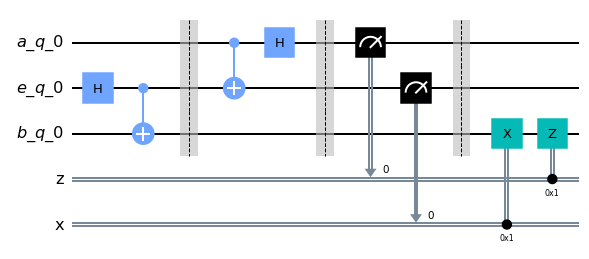

In [5]:
teleportation_circuit.draw(output='mpl')

There you have it! 

For homework you will use this to show me that it works with some random states! 